<a href="https://colab.research.google.com/github/Tatiana1778/Nutritional_planner_AI/blob/main/AI_project_nutrition_userdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
dataset = pd.read_csv("/content/sample_data/Data_of_user.csv", delimiter=';')
dataset.head(15)


,ID,Age,Height (cm),Weight (kg),BMI,BMI_class,Cardiovascular_or_other_chronic_illness,Dietary preferences,Steps_per_day,Average_calories_intake_per_day
0,1,25,194,94,25,Normal,No,Not specified,4000,2739
1,2,18,159,72,29,Overweight,No,Pescatarian,5000,2370
2,3,19,152,71,31,Obese Class I,Yes,Vegan,4000,2767
3,4,24,164,90,34,Obese Class I,Yes,Not specified,4000,2939
4,5,34,171,100,34,Obese Class I,Yes,Not specified,4000,3062
5,6,31,165,101,37,Obese Class II,Yes,Not specified,2000,4569
6,7,26,160,72,28,Overweight,No,Not specified,5000,2436
7,8,20,155,65,27,Overweight,No,Vegetarian,5000,2392
8,9,18,176,80,26,Overweight,No,Vegan,4000,2757
9,10,30,173,72,24,Normal,No,Not specified,7000,2334


# Data Cleanup

In [3]:
col_names = ['ID','Age','Height_cm','Weight_kg','BMI','BMI_class','Cardiovascular_or_other_chronic_illness','Dietary_preferences','Steps_per_day','Average_calories_intake_per_day']

dataset.columns = col_names
dataset.columns

Index(['ID', 'Age', 'Height_cm', 'Weight_kg', 'BMI', 'BMI_class',
       'Cardiovascular_or_other_chronic_illness', 'Dietary_preferences',
       'Steps_per_day', 'Average_calories_intake_per_day'],
      dtype='object')

In [4]:
# view summary of dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   ID                                       319 non-null    int64 
 1   Age                                      319 non-null    int64 
 2   Height_cm                                319 non-null    int64 
 3   Weight_kg                                319 non-null    int64 
 4   BMI                                      319 non-null    int64 
 5   BMI_class                                319 non-null    object
 6   Cardiovascular_or_other_chronic_illness  319 non-null    object
 7   Dietary_preferences                      319 non-null    object
 8   Steps_per_day                            319 non-null    int64 
 9   Average_calories_intake_per_day          319 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 25.0+ KB


In [5]:
# view dimensions of dataset
dataset.shape



(319, 10)

In [6]:
# find categorical variables

categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['BMI_class', 'Cardiovascular_or_other_chronic_illness', 'Dietary_preferences']


In [7]:
# view the categorical variables

dataset[categorical].tail(10)

,BMI_class,Cardiovascular_or_other_chronic_illness,Dietary_preferences
309,Overweight,No,Vegan
310,Overweight,No,Vegan
311,Normal,No,Gluten-Free
312,Normal,No,Not specified
313,Normal,No,Not specified
314,Severe Thinness,No,Not specified
315,Overweight,No,Not specified
316,Obese Class II,Yes,Not specified
317,Normal,No,Not specified
318,Obese Class I,Yes,Not specified


In [8]:
# check labels in region variable

dataset.Dietary_preferences.unique()

array(['Not specified', 'Pescatarian', 'Vegan', 'Vegetarian',
       'Gluten-Free', 'Lactose intolerant'], dtype=object)

In [9]:
# check missing values in categorical variables

dataset[categorical].isnull().sum()

,0
BMI_class,0
Cardiovascular_or_other_chronic_illness,0
Dietary_preferences,0


In [10]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(dataset[var].value_counts())

BMI_class
Normal               91
Overweight           85
Obese Class I        78
Obese Class II       30
Severe Thinness      11
Mild Thinness        10
Moderate Thinness     8
Obese Class III       6
Name: count, dtype: int64
Cardiovascular_or_other_chronic_illness
No     218
Yes    101
Name: count, dtype: int64
Dietary_preferences
Not specified         151
Vegan                  45
Gluten-Free            37
Vegetarian             32
Lactose intolerant     28
Pescatarian            26
Name: count, dtype: int64


In [11]:
# view frequency distribution of categorical variables

for var in categorical:
    # Use float(len(dataset)) instead of np.float(len(dataset))
    print(dataset[var].value_counts() / float(len(dataset)))

BMI_class
Normal               0.285266
Overweight           0.266458
Obese Class I        0.244514
Obese Class II       0.094044
Severe Thinness      0.034483
Mild Thinness        0.031348
Moderate Thinness    0.025078
Obese Class III      0.018809
Name: count, dtype: float64
Cardiovascular_or_other_chronic_illness
No     0.683386
Yes    0.316614
Name: count, dtype: float64
Dietary_preferences
Not specified         0.473354
Vegan                 0.141066
Gluten-Free           0.115987
Vegetarian            0.100313
Lactose intolerant    0.087774
Pescatarian           0.081505
Name: count, dtype: float64


In [12]:

# check frequency distribution of values in region variable

dataset.Dietary_preferences.value_counts()


,count
Dietary_preferences,
Not specified,151
Vegan,45
Gluten-Free,37
Vegetarian,32
Lactose intolerant,28
Pescatarian,26


In [13]:
dataset[['Age','Steps_per_day']]

,Age,Steps_per_day
0,25,4000
1,18,5000
2,19,4000
3,24,4000
4,34,4000
...,...,...
314,19,19000
315,26,4000
316,20,3000
317,18,9000


In [14]:
dataset_bmi=dataset[['Age','Steps_per_day', 'BMI_class']]
dataset_bmi


,Age,Steps_per_day,BMI_class
0,25,4000,Normal
1,18,5000,Overweight
2,19,4000,Obese Class I
3,24,4000,Obese Class I
4,34,4000,Obese Class I
...,...,...,...
314,19,19000,Severe Thinness
315,26,4000,Overweight
316,20,3000,Obese Class II
317,18,9000,Normal


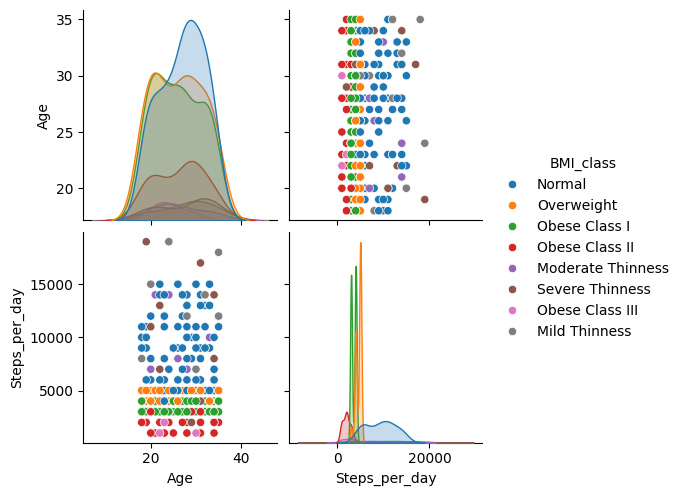

In [15]:
sns.pairplot(dataset_bmi, hue='BMI_class');

In [16]:
dataset_nutrition=dataset[['Average_calories_intake_per_day', 'BMI','Cardiovascular_or_other_chronic_illness']]
dataset_nutrition

,Average_calories_intake_per_day,BMI,Cardiovascular_or_other_chronic_illness
0,2739,25,No
1,2370,29,No
2,2767,31,Yes
3,2939,34,Yes
4,3062,34,Yes
...,...,...,...
314,1202,16,No
315,2447,26,No
316,4458,35,Yes
317,2337,19,No


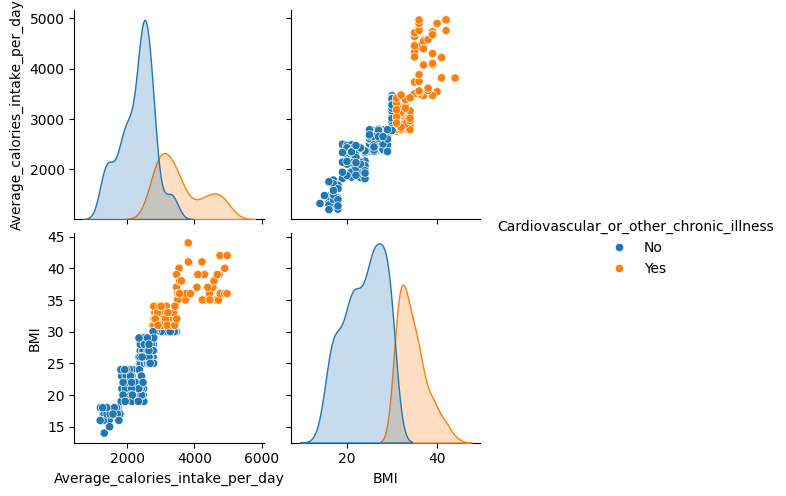

In [17]:
sns.pairplot(dataset_nutrition, hue='Cardiovascular_or_other_chronic_illness');

In [18]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(dataset[var].unique()), ' labels')

BMI_class  contains  8  labels
Cardiovascular_or_other_chronic_illness  contains  2  labels
Dietary_preferences  contains  6  labels


In [19]:
# find numerical variables

numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['ID', 'Age', 'Height_cm', 'Weight_kg', 'BMI', 'Steps_per_day', 'Average_calories_intake_per_day']


In [20]:
# view the numerical variables

dataset[numerical].head()

,ID,Age,Height_cm,Weight_kg,BMI,Steps_per_day,Average_calories_intake_per_day
0,1,25,194,94,25,4000,2739
1,2,18,159,72,29,5000,2370
2,3,19,152,71,31,4000,2767
3,4,24,164,90,34,4000,2939
4,5,34,171,100,34,4000,3062


In [21]:
# check missing values in numerical variables

dataset[numerical].isnull().sum()

,0
ID,0
Age,0
Height_cm,0
Weight_kg,0
BMI,0
Steps_per_day,0
Average_calories_intake_per_day,0


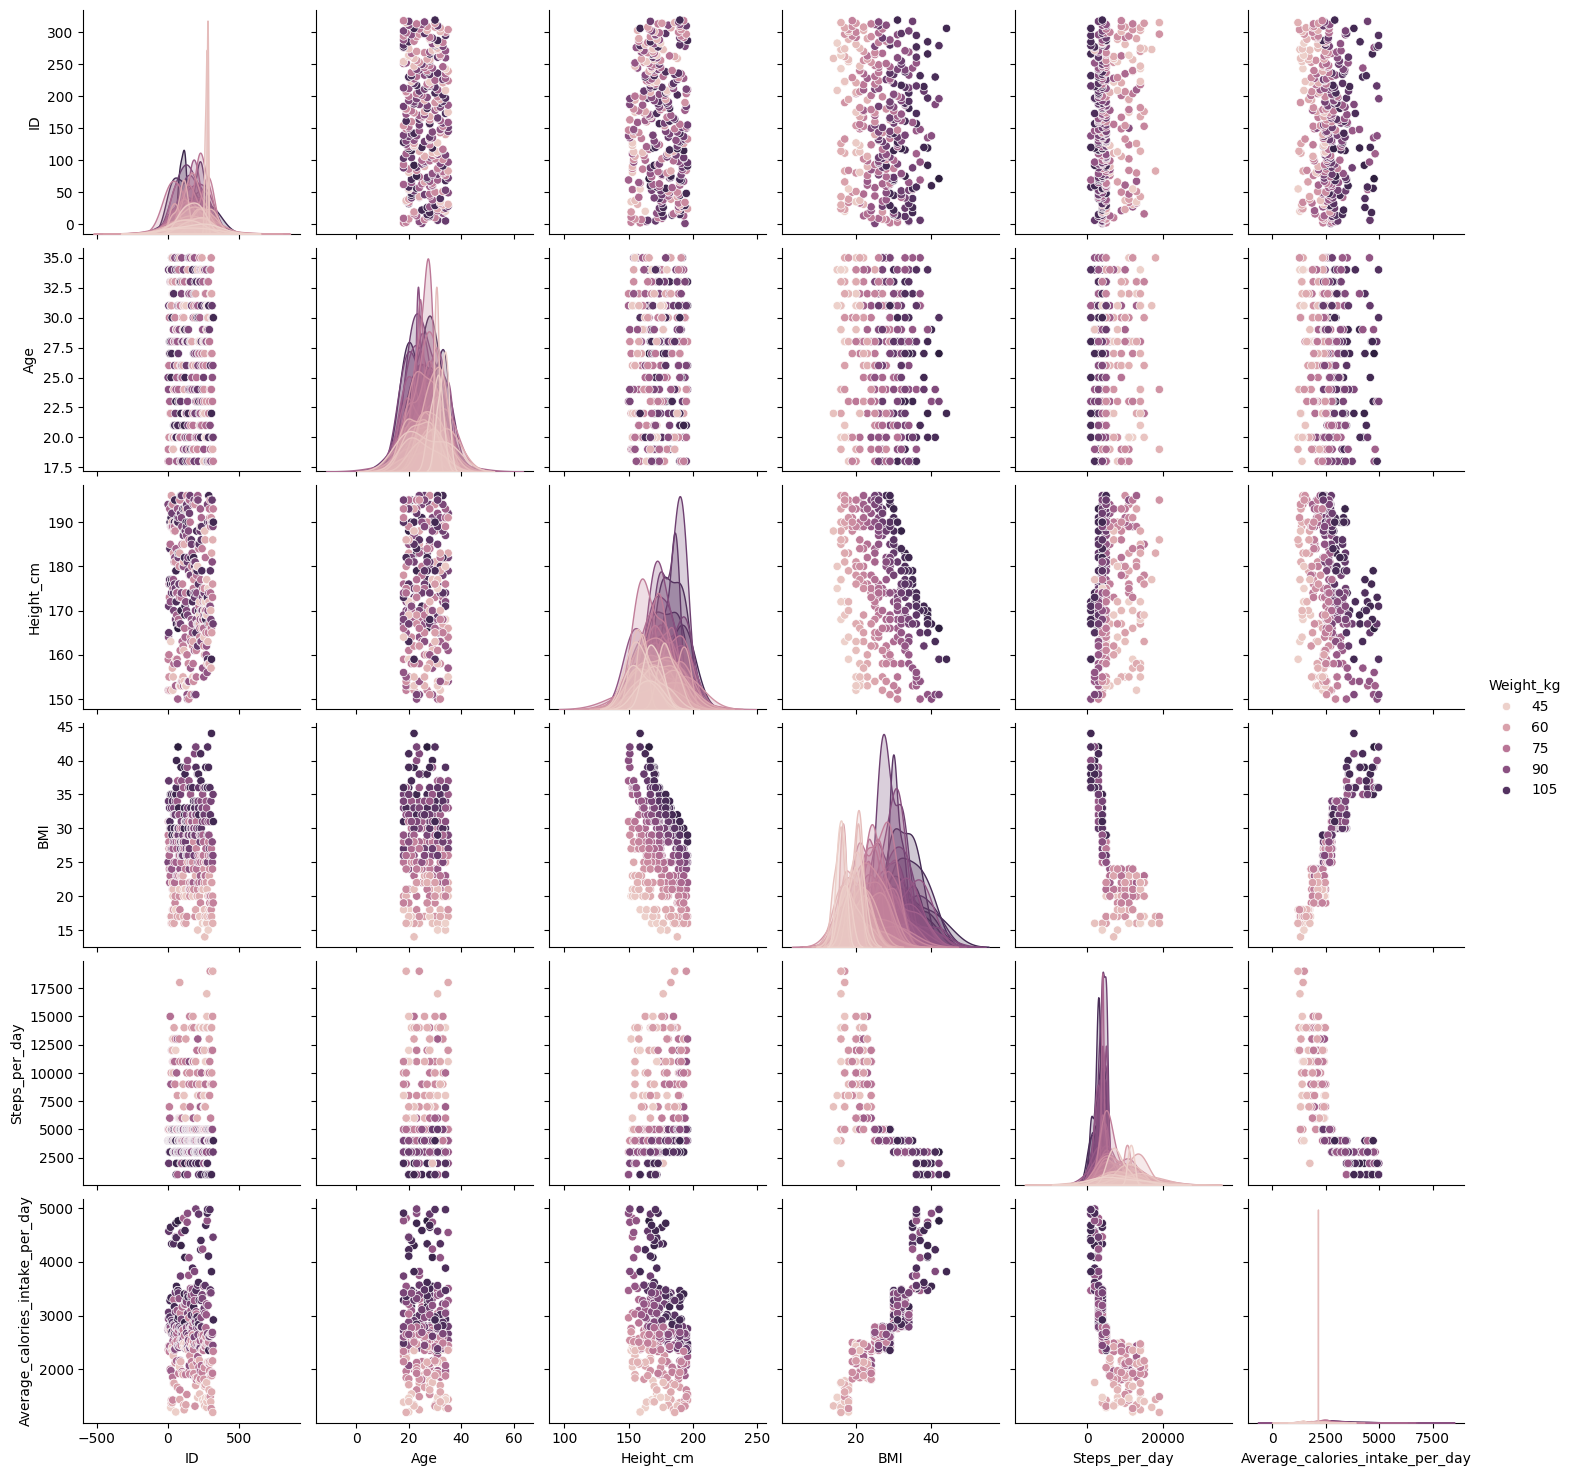

In [22]:
sns.pairplot(dataset, hue='Weight_kg');

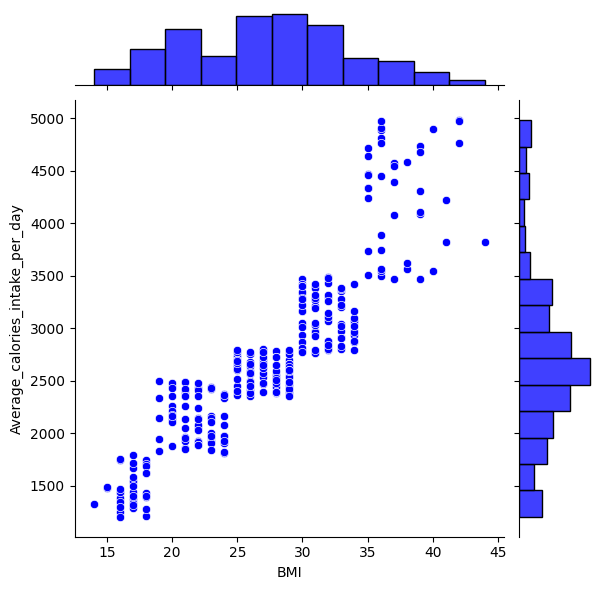

In [23]:
sns.jointplot(x='BMI', y='Average_calories_intake_per_day', data=dataset, color = 'blue')

# Split Data into Training & Testing datasets

In [24]:
X = dataset.drop(['BMI'], axis=1) #x has dropped bmi

y = dataset['BMI'] #y has just bmi and every other are droppped

In [25]:
dataset.shape

(319, 10)

In [26]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [27]:
y_train

,BMI
289,23
261,17
209,22
89,23
248,26
...,...
251,36
192,32
117,32
47,29


In [28]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((223, 9), (96, 9))

#Further Data Processing

In [29]:
# check data types in X_train

X_train.dtypes

,0
ID,int64
Age,int64
Height_cm,int64
Weight_kg,int64
BMI_class,object
Cardiovascular_or_other_chronic_illness,object
Dietary_preferences,object
Steps_per_day,int64
Average_calories_intake_per_day,int64


In [30]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['BMI_class', 'Cardiovascular_or_other_chronic_illness', 'Dietary_preferences']

In [31]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['ID',
 'Age',
 'Height_cm',
 'Weight_kg',
 'Steps_per_day',
 'Average_calories_intake_per_day']

In [32]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

,0
BMI_class,0.0
Cardiovascular_or_other_chronic_illness,0.0
Dietary_preferences,0.0


In [33]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))
#there are none

In [34]:
# check missing values in X_train

X_train.isnull().sum()

,0
ID,0
Age,0
Height_cm,0
Weight_kg,0
BMI_class,0
Cardiovascular_or_other_chronic_illness,0
Dietary_preferences,0
Steps_per_day,0
Average_calories_intake_per_day,0


In [35]:
# check missing values in X_test

X_test.isnull().sum()

,0
ID,0
Age,0
Height_cm,0
Weight_kg,0
BMI_class,0
Cardiovascular_or_other_chronic_illness,0
Dietary_preferences,0
Steps_per_day,0
Average_calories_intake_per_day,0


In [36]:
X_train[categorical].head()

,BMI_class,Cardiovascular_or_other_chronic_illness,Dietary_preferences
289,Normal,No,Not specified
261,Moderate Thinness,No,Not specified
209,Normal,No,Vegetarian
89,Normal,No,Not specified
248,Overweight,No,Not specified


#Encode Categorical Data into Numbers

In [37]:
# import category encoders
!pip install category_encoders
from sklearn import preprocessing
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['BMI_class','Cardiovascular_or_other_chronic_illness','Dietary_preferences'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.4 MB/s eta 0:00:00


In [38]:
# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['BMI_class','Cardiovascular_or_other_chronic_illness','Dietary_preferences'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


In [39]:
X_train.head()

,ID,Age,Height_cm,Weight_kg,BMI_class_1,BMI_class_2,BMI_class_3,BMI_class_4,BMI_class_5,BMI_class_6,...,Cardiovascular_or_other_chronic_illness_1,Cardiovascular_or_other_chronic_illness_2,Dietary_preferences_1,Dietary_preferences_2,Dietary_preferences_3,Dietary_preferences_4,Dietary_preferences_5,Dietary_preferences_6,Steps_per_day,Average_calories_intake_per_day
289,290,28,158,58,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,13000,2102
261,262,20,186,57,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,7000,1716
209,210,31,196,84,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,13000,2242
89,90,26,153,54,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,6000,2143
248,249,26,169,74,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,4000,2355


In [40]:
X_train.shape

(223, 22)

In [41]:
X_test.head()

,ID,Age,Height_cm,Weight_kg,BMI_class_1,BMI_class_2,BMI_class_3,BMI_class_4,BMI_class_5,BMI_class_6,...,Cardiovascular_or_other_chronic_illness_1,Cardiovascular_or_other_chronic_illness_2,Dietary_preferences_1,Dietary_preferences_2,Dietary_preferences_3,Dietary_preferences_4,Dietary_preferences_5,Dietary_preferences_6,Steps_per_day,Average_calories_intake_per_day
314,315,19,186,55,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,19000,1202
267,268,26,165,68,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,5000,2612
15,16,22,185,77,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,15000,2002
65,66,26,190,60,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,8000,1670
214,215,27,170,109,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,2000,3617


In [42]:
X_test.shape

(96, 22)

In [43]:
cols = X_train.columns
X_train.replace('Not specified', np.nan, inplace=True)
X_test.replace('Not specified', np.nan, inplace=True)

In [44]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [45]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [46]:
X_test = pd.DataFrame(X_test, columns=[cols])



```
# This is formatted as code
```

#Train on Training Data

In [47]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
gnb = GaussianNB()
#gnb = KNeighborsClassifier(3)


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

#Predict Y based on X variables

In [48]:
y_pred = gnb.predict(X_test)

y_pred

array([16, 23, 23, 16, 39, 29, 22, 34, 23, 37, 34, 29, 34, 34, 33, 23, 21,
       34, 23, 21, 26, 30, 29, 30, 16, 27, 28, 29, 29, 23, 21, 16, 26, 30,
       33, 37, 23, 29, 37, 29, 29, 21, 36, 36, 42, 29, 19, 29, 34, 29, 29,
       29, 16, 34, 29, 23, 22, 29, 27, 37, 26, 27, 29, 18, 29, 29, 36, 20,
       36, 23, 27, 23, 23, 34, 23, 37, 33, 23, 29, 21, 34, 34, 29, 29, 33,
       23, 32, 26, 23, 18, 29, 34, 15, 29, 21, 23])

#Determine Accuracy

In [49]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.2917


In [50]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([23, 16, 22, 23, 29, 29, 34, 36, 27, 18, 34, 34, 27, 18, 28, 17, 23,
       34, 32, 23, 27, 29, 29, 27, 34, 29, 23, 22, 27, 34, 23, 30, 38, 34,
       29, 20, 15, 23, 29, 23, 23, 29, 23, 34, 17, 34, 34, 19, 34, 39, 23,
       28, 18, 30, 23, 36, 23, 29, 20, 34, 37, 23, 29, 29, 29, 34, 29, 29,
       34, 34, 30, 32, 29, 37, 34, 23, 16, 34, 23, 32, 34, 16, 32, 16, 16,
       20, 30, 29, 21, 34, 34, 34, 29, 34, 30, 34, 23, 29, 34, 29, 23, 20,
       22, 34, 21, 23, 21, 29, 27, 16, 37, 27, 34, 23, 32, 29, 23, 30, 34,
       23, 18, 30, 23, 21, 20, 23, 23, 34, 32, 23, 29, 23, 22, 16, 23, 27,
       19, 29, 29, 42, 29, 30, 19, 29, 29, 36, 30, 38, 16, 41, 23, 19, 29,
       34, 34, 34, 27, 34, 29, 16, 39, 19, 23, 23, 27, 18, 19, 37, 18, 38,
       37, 23, 15, 16, 23, 23, 23, 35, 36, 29, 29, 29, 29, 21, 26, 30, 34,
       23, 34, 33, 17, 23, 37, 29, 36, 22, 27, 34, 36, 32, 39, 30, 32, 29,
       44, 20, 23, 35, 23, 29, 42, 34, 23, 16, 23, 29, 23, 42, 36, 34, 34,
       29, 36])

In [51]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.4305


#Run Predictions on Test Data

In [52]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.4305
Test set score: 0.2917


#Accuracy

In [53]:
# check class distribution in test set

y_test.value_counts()

,count
BMI,
29,10
27,7
26,7
28,6
22,6
33,5
31,5
25,5
23,4


In [54]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [55]:
y_test

,BMI
314,16
267,25
15,23
65,17
214,38
...,...
281,31
29,16
97,26
20,24
